In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')

In [15]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
X = dataset.iloc[:, [3,4]].values

Text(0, 0.5, 'WCSS')

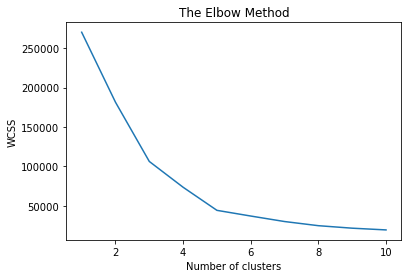

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [27]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(X)

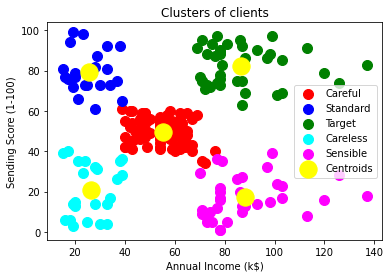

In [29]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Sending Score (1-100)')
plt.legend()
plt.show()